 /Users/abhinavtripathi/opt/anaconda3/lib/python3.8/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1
 /Users/abhinavtripathi/opt/anaconda3/lib/python3.8/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1
 /Users/abhinavtripathi/opt/anaconda3/lib/python3.8/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1
 /Users/abhinavtripathi/opt/anaconda3/lib/python3.8/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1
 /Users/abhinavtripathi/opt/anaconda3/lib/python3.8/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1
 /Users/abhinavtripathi/opt/anaconda3/lib/python3.8/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1
 /Users/abhinavtripathi/opt/anaconda3/lib/python3.8/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1
 /User

 /Users/abhinavtripathi/opt/anaconda3/lib/python3.8/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1
 /Users/abhinavtripathi/opt/anaconda3/lib/python3.8/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1
 /Users/abhinavtripathi/opt/anaconda3/lib/python3.8/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1
 /Users/abhinavtripathi/opt/anaconda3/lib/python3.8/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1
 /Users/abhinavtripathi/opt/anaconda3/lib/python3.8/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1
 /Users/abhinavtripathi/opt/anaconda3/lib/python3.8/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1
 /Users/abhinavtripathi/opt/anaconda3/lib/python3.8/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1
 /User

 /Users/abhinavtripathi/opt/anaconda3/lib/python3.8/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1
 /Users/abhinavtripathi/opt/anaconda3/lib/python3.8/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1
 /Users/abhinavtripathi/opt/anaconda3/lib/python3.8/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1
 /Users/abhinavtripathi/opt/anaconda3/lib/python3.8/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1
 /Users/abhinavtripathi/opt/anaconda3/lib/python3.8/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1
 /Users/abhinavtripathi/opt/anaconda3/lib/python3.8/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1
 /Users/abhinavtripathi/opt/anaconda3/lib/python3.8/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1
 /User

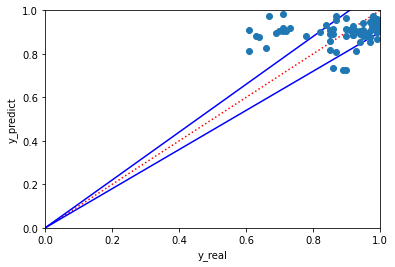

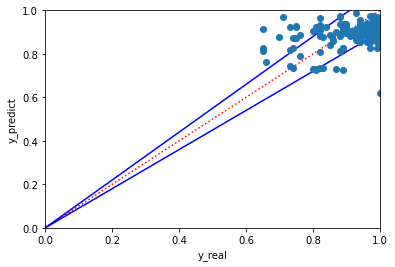

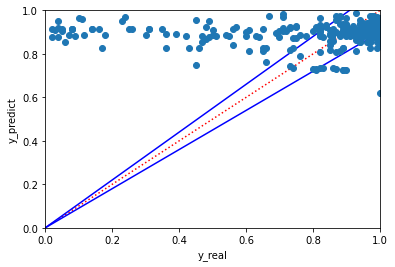

In [1]:
# Catalyst yield prediction using Gaussian Processes
import GPy
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#import folder path name
path = "data/DMAT_"


input_iter = [[0,'00000'],[0,'00001'],[0,'00010'],[0,'00011'],[0,'00100'],[0,'00110'],
              [0,'00111'],[0,'01000'],[0,'01001'],[0,'01010'],[0,'01011'],[0,'01100'],
              [0,'01101'],[0,'01110'],[0,'01111'],[0,'10000'],[0,'10001'],[0,'10010'],
              [0,'10011'],[0,'10100'],[0,'10110'],[0,'10111'],[0,'11000'],[0,'11001'],
              [0,'11010'],[0,'11011'],[0,'11100'],[0,'11101'],[0,'11110'],[0,'11111'],
              [1,'00000'],[1,'00001'],[1,'00010'],[1,'00011'],[1,'00100'],[1,'00110'],
              [1,'00111'],[1,'01000'],[1,'01001'],[1,'01010'],[1,'01011'],[1,'01100'],
              [1,'01101'],[1,'01110'],[1,'01111'],[1,'10000'],[1,'10001'],[1,'10010'],
              [1,'10011'],[1,'10100'],[1,'10110'],[1,'10111'],[1,'11000'],[1,'11001'],
              [1,'11010'],[1,'11011'],[1,'11100'],[1,'11101'],[1,'11110'],[1,'11111']]

maxiters = 2000

def raw_data(path, s,cutoff):
    data = pd.read_csv(path+str(s[0])+"_"+s[1]+".csv",header = None)
    feature_length = len(data.columns)-2
    reduced_data = data[data[len(data.columns)-1]>cutoff*100]
    data = data[data[len(data.columns)-1]>1]
    X_all = data.loc[:,0:feature_length]
    y_all= data[feature_length+1]
    X_all = X_all.to_numpy()
    y_all = y_all.to_numpy()
    X = reduced_data.loc[:,0:feature_length]
    y= reduced_data[feature_length+1]
    X = X.to_numpy()
    y = y.to_numpy()
    return X,y,X_all,y_all


def create_kernel(num_samples):
    k1 = GPy.kern.RatQuad(input_dim=num_samples,ARD=True)
    k2 = GPy.kern.ExpQuad(input_dim=num_samples,ARD=True)
    #k2 = GPy.kern.Linear(input_dim=num_samples, ARD=True) 
    #k3 = GPy.kern.Bias(input_dim =num_samples)
    #k4 = GPy.kern.Add([k1,k2])
    return k2


def plot_save_fig (filename,y1,y2,y3):
    xplot = np.array([0,1])
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel("y_real")
    plt.ylabel("y_predict")
    plt.plot(xplot,xplot, linestyle = 'dotted', color = 'r')
    plt.plot(xplot,0.9*xplot, color = 'b')
    plt.plot(xplot,1.1*xplot, color = 'b')
    plt.errorbar(y1, y2.reshape(y1.shape),yerr = y3.reshape(y1.shape),fmt ='o')
    plt.savefig(filename)
    plt.show()
    
    
def calculate_mse_mean_accuracy_mae (ytrue,ypred):
    acc = 1 - abs(ypred.reshape(ytrue.shape)-ytrue)/ytrue
    mean_acc = acc.sum()/len(acc)
    return mean_squared_error(ytrue,ypred), mean_acc, mean_absolute_error(ytrue,ypred)
    

    
#train_frac = np.array([0.5,0.6,0.7,0.8,0.9])
#small_yield_frac = np.array([0.2,0.3,0.4,0.5,0.6,0.7])

#for testing kernels quickly (uncomment):
train_frac = np.array([0.7])
small_yield_frac = np.array([0.6])

for i in range(1):
    for train_frac_ in train_frac:
        for small_yield_frac_ in small_yield_frac:
            X,y,X_all,y_all = raw_data(path,input_iter[59],small_yield_frac_)
            
            #normalization start
            X[X==0]=1
            X_max = X.max(axis=0)
            X = X/X_max
            y=y/100.0
            X_all[X_all == 0] =1
            X_all_max = X_all.max(axis=0)
            X_all = X_all/X_all_max
            y_all = y_all/100.0
            #normalization end
            
            #test-train split
            X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 1-train_frac_,random_state =42)
            kernel = create_kernel(len(X_train[0]))
            
            
            """
            #Full training data 
            model = GPy.models.GPRegression(X_train,y_train.reshape(-1,1),kernel)
            model.optimize('bfgs',max_iters = maxiters)
            cv_errors  = model.inference_method.LOO(kernel, X_train, y_train.reshape(-1,1), model.likelihood, model.posterior)
            cv_error = np.sum(abs(cv_errors))/len(cv_errors)
            print("Cross Validation error:", cv_error)
            
            """
            

            #cross-validation training
            #leave-one-out validation splits
            num_samples = len(X_train)
            kf = KFold(n_splits = num_samples)
            
            
            kernel = create_kernel(len(X_train[0]))
            
            k = 0
            cv_mse = []
            cv_accuracy = []
            for train_index, test_index in kf.split(X_train):
                if k==0:
                    model = GPy.models.GPRegression(X[train_index],y[train_index].reshape(-1,1),kernel)
                    model.optimize('bfgs',max_iters = maxiters)
                    k = 1
                    y_testCV_pred, y_testCV_std_pred = model.predict(X[test_index])
                    cv_mse.append(mean_squared_error(y[test_index],y_testCV_pred))
                    acc = 1-(abs(y[test_index]-y_testCV_pred)/y[test_index])
                    cv_accuracy.append(acc)
                    
                else:
                    model = GPy.models.GPRegression(X[train_index],y[train_index].reshape(-1,1),kernel)
                    model.optimize('bfgs',max_iters = maxiters)
                    y_testCV_pred, y_testCV_std_pred = model.predict(X[test_index])
                    cv_mse.append(mean_squared_error(y[test_index],y_testCV_pred))
                    acc = 1-(abs(y[test_index]-y_testCV_pred)/y[test_index])
                    cv_accuracy.append(acc)
                    
            
            s = input_iter[59]
            #test data prediction and save
            y_test_pred, y_test_std = model.predict(X_test)
            path = "metrics/test/"
            test_metrics = np.array(calculate_mse_mean_accuracy_mae (y_test,y_test_pred))
         filename = path +"test_mse_meanacc_mae"+"_dataflag_"+str(s[0])+"_"+s[1]+"_trainfrac_"+str(train_frac_)+"_small_yield_frac_"+str(small_yield_frac_)+".txt"
            np.savetxt(filename, test_metrics, delimiter=",")
            
            #train data prediction and save
            y_train_pred, y_train_std = model.predict(X_train)
            path = "metrics/train/"
            train_metrics = np.array(calculate_mse_mean_accuracy_mae (y_train,y_train_pred))
            filename = path +"train_mse_meanacc_mae"+"_dataflag_"+str(s[0])+"_"+s[1]+"_trainfrac_"+str(train_frac_)+"_small_yield_frac_"+str(small_yield_frac_)+".txt"
            np.savetxt(filename, train_metrics, delimiter=",")
            
            #all data prediction and save
            y_pred, y_std = model.predict(X_all)  
            path = "metrics/all/"
            all_metrics = np.array(calculate_mse_mean_accuracy_mae (y_all,y_pred))
            filename = path +"all_mse_meanacc_mae"+"_dataflag_"+str(s[0])+"_"+s[1]+"_trainfrac_"+str(train_frac_)+"_small_yield_frac_"+str(small_yield_frac_)+".txt"
            np.savetxt(filename, all_metrics, delimiter=",")
            
            #plot test data
            path = "plots/test/"
            filename = path + "test_dataflag_"+str(s[0])+"_"+s[1]+"_trainfrac_"+str(train_frac_)+"_small_yield_frac_"+str(small_yield_frac_)+".pdf"
            plot_save_fig(filename, y_test, y_test_pred, y_test_std)       
            
    
            #plot train data
            path = "plots/train/"
            filename = path + "train_dataflag_"+str(s[0])+"_"+s[1]+"_trainfrac_"+str(train_frac_)+"_small_yield_frac_"+str(small_yield_frac_)+".pdf"
            plot_save_fig(filename, y_train, y_train_pred, y_train_std)
            
            #plot all data
            path = "plots/all/"
            filename = path + "all_dataflag_"+str(s[0])+"_"+s[1]+"_trainfrac_"+str(train_frac_)+"_small_yield_frac_"+str(small_yield_frac_)+".pdf"
            plot_save_fig(filename, y_all, y_pred, y_std)
            
            #save test results
            path = "results/test/"
            filename = path + "test_means_dataflag_"+str(s[0])+"_"+s[1]+"_trainfrac_"+str(train_frac_)+"_small_yield_frac_"+str(small_yield_frac_)+".txt"
            np.savetxt(filename,y_test_pred,delimiter =',')
            filename = path + "test_std_dataflag_"+str(s[0])+"_"+s[1]+"_trainfrac_"+str(train_frac_)+"_small_yield_frac_"+str(small_yield_frac_)+".txt"
            np.savetxt(filename,y_test_std,delimiter =',')
            filename = path + "test_trues_dataflag_"+str(s[0])+"_"+s[1]+"_trainfrac_"+str(train_frac_)+"_small_yield_frac_"+str(small_yield_frac_)+".txt"
            np.savetxt(filename,y_test,delimiter =',')
            
            #save train results
            path = "results/train/"
            filename = path + "train_means_dataflag_"+str(s[0])+"_"+s[1]+"_trainfrac_"+str(train_frac_)+"_small_yield_frac_"+str(small_yield_frac_)+".txt"
            np.savetxt(filename,y_train_pred,delimiter =',')
            filename = path + "test_std_dataflag_"+str(s[0])+"_"+s[1]+"_trainfrac_"+str(train_frac_)+"_small_yield_frac_"+str(small_yield_frac_)+".txt"
            np.savetxt(filename,y_train_std,delimiter =',')
            filename = path + "test_trues_dataflag_"+str(s[0])+"_"+s[1]+"_trainfrac_"+str(train_frac_)+"_small_yield_frac_"+str(small_yield_frac_)+".txt"
            np.savetxt(filename,y_train,delimiter =',')
            
            #save all results
            path = "results/all/"
            filename = path + "all_means_dataflag_"+str(s[0])+"_"+s[1]+"_trainfrac_"+str(train_frac_)+"_small_yield_frac_"+str(small_yield_frac_)+".txt"
            np.savetxt(filename,y_pred,delimiter =',')
            filename = path + "all_std_dataflag_"+str(s[0])+"_"+s[1]+"_trainfrac_"+str(train_frac_)+"_small_yield_frac_"+str(small_yield_frac_)+".txt"
            np.savetxt(filename,y_std,delimiter =',')
            filename = path + "all_trues_dataflag_"+str(s[0])+"_"+s[1]+"_trainfrac_"+str(train_frac_)+"_small_yield_frac_"+str(small_yield_frac_)+".txt"
            np.savetxt(filename,y_all,delimiter =',')
            
        
            
        
        
    






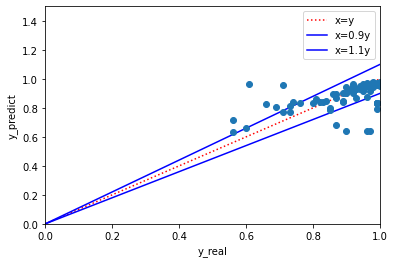

0.9175122944747416

0.0091706580220256

ValueError: cannot reshape array of size 115 into shape (115,0)

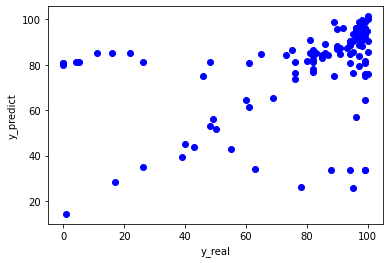

array([0.99 , 0.89 , 0.65 , 0.17 , 0.97 , 0.89 , 0.74 , 0.46 , 0.66 ,
       0.43 , 0.36 , 0.24 , 0.88 , 0.98 , 0.98 , 0.98 , 0.98 , 0.98 ,
       0.97 , 0.98 , 0.98 , 0.98 , 0.98 , 1.   , 1.   , 1.   , 0.11 ,
       0.1  , 0.98 , 0.99 , 0.98 , 0.87 , 0.98 , 1.   , 0.94 , 1.   ,
       0.98 , 0.07 , 0.115, 0.96 , 0.822, 0.98 , 0.97 , 0.98 , 0.856,
       0.97 , 0.99 , 0.99 , 0.98 , 0.98 , 0.74 , 0.75 , 0.91 , 0.83 ,
       0.977, 0.997, 0.96 , 0.99 , 0.9  , 0.99 , 0.02 , 0.35 , 0.98 ,
       0.99 , 0.36 , 0.39 , 0.99 , 0.25 , 0.56 , 0.99 , 0.99 , 0.95 ,
       0.95 , 0.94 , 0.94 , 0.85 , 0.6  , 0.95 , 0.82 , 0.85 , 0.6  ,
       0.85 , 0.56 , 0.76 , 0.93 , 0.72 , 0.94 , 0.92 , 0.42 , 0.9  ,
       0.88 , 0.93 , 0.85 , 0.91 , 0.71 , 0.95 , 0.92 , 0.51 , 0.9  ,
       0.86 , 0.94 , 0.86 , 0.7  , 0.5  , 0.3  , 0.5  , 0.65 , 0.98 ,
       0.99 , 0.99 , 0.99 , 0.99 , 0.8  , 0.9  , 0.96 , 0.82 , 0.84 ,
       0.96 , 0.92 , 0.92 , 0.97 , 0.99 , 0.88 , 0.99 , 0.65 , 0.94 ,
       0.98 , 0.08 ,

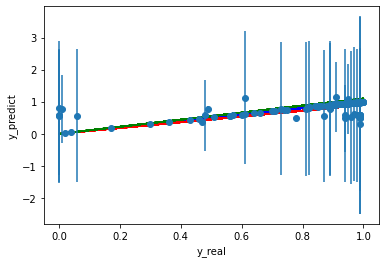

(103, 1)

0.04262213322962716

  sum.                 |                 value  |  constraints  |  priors
  RatQuad.variance     |    0.4377265406731879  |      +ve      |        
  RatQuad.lengthscale  |                (280,)  |      +ve      |        
  RatQuad.power        |  0.012536075579845181  |      +ve      |        
  linear.variances     |                (280,)  |      +ve      |        
  bias.variance        |  0.061876919636478636  |      +ve      |        


Initial kernel, j = 9  :
   sum.                 |                  value  |  constraints  |  priors
  RatQuad.variance     |     0.9536073889946534  |      +ve      |        
  RatQuad.lengthscale  |                 (291,)  |      +ve      |        
  RatQuad.power        |  0.0036788823515075974  |      +ve      |        
  linear.variances     |                 (291,)  |      +ve      |        
  bias.variance        |   0.009522585095822126  |      +ve      |        


0.9233948695489875

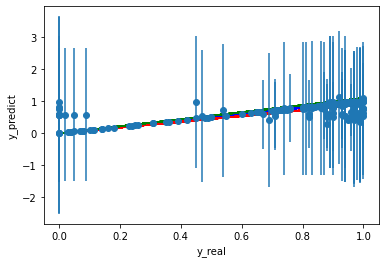

array([[7.94055864e-04],
       [6.72769103e-04],
       [5.99235744e-04],
       [7.82659852e-04],
       [2.08169082e+00],
       [7.92981890e-04],
       [6.23077390e-04],
       [4.96875132e-04],
       [7.93638576e-04],
       [7.93110624e-04],
       [7.50248316e-04],
       [2.09101803e+00],
       [7.90659359e-04],
       [6.23463827e-04],
       [2.07480204e+00],
       [6.38860159e-04],
       [7.93024670e-04],
       [7.61397409e-04],
       [5.69120193e-04],
       [2.08122964e+00],
       [7.82788882e-04],
       [6.95361827e-04],
       [2.08997657e+00],
       [7.95148414e-04],
       [1.04526969e+00],
       [6.94689913e-02],
       [7.68214330e-04],
       [6.83077480e-04],
       [1.07117721e+00],
       [2.10056582e-02],
       [7.88345042e-04],
       [7.94057352e-04],
       [2.08057092e+00],
       [7.93101045e-04],
       [7.78246243e-04],
       [7.66414786e-04],
       [7.91468136e-04],
       [7.93326165e-04],
       [2.08179661e+00],
       [2.08162017e+00],


In [145]:
X_all

array([[0.57893266, 0.56322299, 0.50015217, ..., 1.        , 1.        ,
        0.05525   ],
       [0.57893266, 0.56322299, 0.50015217, ..., 1.        , 1.        ,
        0.05525   ],
       [0.57893266, 0.56322299, 0.50015217, ..., 1.        , 1.        ,
        0.05525   ],
       ...,
       [0.59506899, 0.58916469, 0.54688243, ..., 1.        , 1.        ,
        0.0875    ],
       [0.59506899, 0.58916469, 0.54688243, ..., 1.        , 1.        ,
        0.0875    ],
       [0.59506899, 0.58916469, 0.54688243, ..., 1.        , 1.        ,
        0.0875    ]])

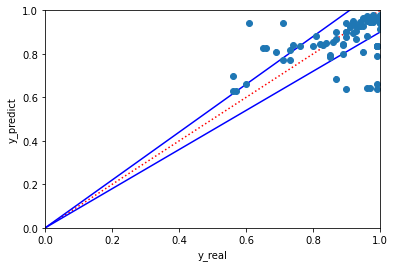

0.01027433903743843

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

NameError: name 'input_iter' is not defined

,0,1,2,3,4,5,6,7,8,9,...,269,270,271,272,273,274,275,276,277,278
0,379.2655,839.004,1489.2720,2246.3004,2794.269,3862.0,8846.0,12776.0,14890.0,15752.0,...,0,0,0,0,0,0,0,0,8.84,99.0
1,379.2655,839.004,1489.2720,2246.3004,2794.269,3862.0,8846.0,12776.0,14890.0,15752.0,...,0,0,0,0,0,0,0,0,8.84,89.0
2,379.2655,839.004,1489.2720,2246.3004,2794.269,3862.0,8846.0,12776.0,14890.0,15752.0,...,0,0,0,0,0,0,0,0,8.84,65.0
3,379.2655,839.004,1489.2720,2246.3004,2794.269,3862.0,8846.0,12776.0,14890.0,15752.0,...,0,0,0,0,0,0,0,0,8.84,17.0
4,379.2655,839.004,1489.2720,2246.3004,2794.269,3862.0,8846.0,12776.0,14890.0,15752.0,...,0,0,0,0,0,0,0,0,8.84,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,389.8366,877.648,1628.4178,2510.1280,3128.556,4102.0,10376.0,14474.0,16056.0,17352.0,...,0,1,0,0,0,0,0,0,14.00,96.0
344,389.8366,877.648,1628.4178,2510.1280,3128.556,4102.0,10376.0,14474.0,16056.0,17352.0,...,0,1,0,0,0,0,0,0,14.00,88.0
345,389.8366,877.648,1628.4178,2510.1280,3128.556,4102.0,10376.0,14474.0,16056.0,17352.0,...,0,1,0,0,0,0,0,0,14.00,94.0
346,389.8366,877.648,1628.4178,2510.1280,3128.556,4102.0,10376.0,14474.0,16056.0,17352.0,...,0,0,0,0,1,0,0,0,14.00,87.0


Gaussian_noise.,value,constraints,priors
variance,0.0077032460721644744,+ve,
